# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Description of the data

The dataset contains the following fields:
- `price`

- `model_year`

- `model`

- `condition`

- `cylinders`

- `fuel` — gas, diesel, etc.

- `odometer` — the vehicle's mileage when the ad was published

- `transmission`

- `paint_color`

- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)

- `date_posted` — the date the ad was published

- `days_listed` — from publication to removal

## Open the data file and study the general information. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import numpy as np
import math
from sklearn.preprocessing import FunctionTransformer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Target feature: Price. We want to understand which factors impact on the price either positively or negatively. 

In [2]:
car_sales_ads = pd.read_csv('/datasets/vehicles_us.csv', sep=',')

In [3]:
car_sales_ads.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
car_sales_ads.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
40151,5995,2004.0,chevrolet trailblazer,excellent,NaN,gas,NaN,automatic,SUV,silver,1.0,2018-08-01,20
17742,6300,2015.0,ford focus se,excellent,4.0,gas,108400.0,automatic,sedan,grey,NaN,2018-12-14,61
4803,8950,2011.0,chevrolet silverado 1500,good,6.0,gas,121333.0,automatic,truck,white,NaN,2018-09-22,47
23534,7200,2013.0,ford fusion se,excellent,NaN,gas,88686.0,automatic,sedan,silver,NaN,2019-03-04,40
22139,4500,2006.0,honda accord,excellent,4.0,gas,201000.0,automatic,sedan,white,NaN,2018-06-24,9


In [5]:
car_sales_ads.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
car_sales_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
car_sales_missing = car_sales_ads.isna().sum()

Nmbre of rows:

In [8]:
len(car_sales_ads)

51525

The total nmbre of missing values for each column:

In [9]:
car_sales_missing

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Gathering all missing data together and calling it `just_missing_columns`

In [10]:
just_missing_columns = pd.concat([car_sales_ads['model_year'], car_sales_ads['cylinders'], car_sales_ads['odometer'], car_sales_ads['paint_color'], car_sales_ads['is_4wd']], axis=1)
just_missing_columns.columns = ["na_model_yers","na_cylinders","na_odometer","na_paint_color","na_is_4wd"]
just_missing_columns.head()
len(just_missing_columns)

,na_model_yers,na_cylinders,na_odometer,na_paint_color,na_is_4wd
0,2011.0,6.0,145000.0,NaN,1.0
1,NaN,6.0,88705.0,white,1.0
2,2013.0,4.0,110000.0,red,NaN
3,2003.0,8.0,NaN,NaN,NaN
4,2017.0,4.0,80903.0,black,NaN


51525

Let's create a dataframe showing up all details about missing values.

In [11]:
car_sales_missing_df = pd.concat([just_missing_columns.dtypes, just_missing_columns.isna().sum(), just_missing_columns.isna().sum()/len(just_missing_columns)], axis=1)
car_sales_missing_df.columns = ["na_type", "na_count", "na_ratio"]
car_sales_missing_df.sort_values(by="na_ratio", ascending=True)

,na_type,na_count,na_ratio
na_model_yers,float64,3619,0.070238
na_cylinders,float64,5260,0.102086
na_odometer,float64,7892,0.153168
na_paint_color,object,9267,0.179854
na_is_4wd,float64,25953,0.503697


In [12]:
#clearly `is_4wd` column is a Boolean column, lets verify what values we actually have
just_missing_columns['na_is_4wd'].value_counts()
#and so all other rows are missing

1.0    25572
Name: na_is_4wd, dtype: int64

Showing different categorical columns:
- `model` column:

In [13]:
car_sales_ads["model"].value_counts() 

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

- `condition` :

In [14]:
car_sales_ads["condition"].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

- `fuel`

In [15]:
car_sales_ads["fuel"].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

- `transmission`

In [16]:
car_sales_ads["transmission"].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

- `type`

In [17]:
car_sales_ads["type"].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

- `paint_color`

In [18]:
car_sales_ads["paint_color"].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

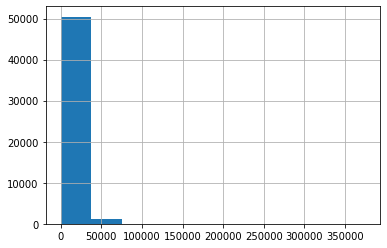

In [19]:
car_sales_ads["price"].hist()

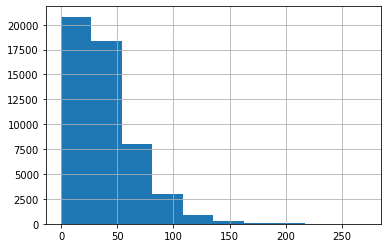

In [20]:
car_sales_ads["days_listed"].hist()

Study correlation between columns:

In [21]:
car_sales_ads_col = ["model_year",
                     "cylinders",
                     "odometer",
                     "days_listed"]

for col in car_sales_ads_col:
    car_sales_ads[[col, "price"]].corr()

,model_year,price
model_year,1.000000,0.428656
price,0.428656,1.000000


,cylinders,price
cylinders,1.000000,0.296627
price,0.296627,1.000000


,odometer,price
odometer,1.000000,-0.420299
price,-0.420299,1.000000


,days_listed,price
days_listed,1.000000,-0.000682
price,-0.000682,1.000000


### Conclusion

After an inversigation on the data, we can see that:
- 5 among 13 columns contain missing values. Which are: 
    - `model_yers`
    
    - `cylinders`	
    
    - `odometer`
    
    - `paint_color`	
    
    - `is_4wd`
- Missing values vary from ≈ 7% to 50% 
- We can see a correlation between some columns
- Let's get rid of missing values first!

## Data preprocessing

We set the dataframe for only missing values:

In [22]:
just_missing_columns.head()

,na_model_yers,na_cylinders,na_odometer,na_paint_color,na_is_4wd
0,2011.0,6.0,145000.0,NaN,1.0
1,NaN,6.0,88705.0,white,1.0
2,2013.0,4.0,110000.0,red,NaN
3,2003.0,8.0,NaN,NaN,NaN
4,2017.0,4.0,80903.0,black,NaN


**`is_4wd` column**
- Filling NA in `is_4wd` column, it's clear that na are 0 since it's a boolean column.

In [23]:
car_sales_ads['is_4wd'] = car_sales_ads['is_4wd'].fillna(value = 0).reset_index(drop = True)

In [24]:
car_sales_ads['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

**`odometer` column**
- As we've seen, the correlation between `odometer` and `price` columns is negative, wich means that the relationship between those two columns runs in the opposite. 
- Let's try to fill those values

In [25]:
median_odometer = car_sales_ads['odometer'].mean()
car_sales_ads['odometer'] = car_sales_ads['odometer'].fillna(value = median_odometer).reset_index(drop=True)

In [26]:
car_sales_ads['odometer'].isna().sum()

0

In [27]:
car_sales_ads[["odometer", "price"]].corr()

,odometer,price
odometer,1.000000,-0.385297
price,-0.385297,1.000000


We still have the correlation between those 2 columns.

**`cylinders` column**
- As we've seen, there is a strong correlation between `price` and `cylinders` column.

In [28]:
max_cylinders = car_sales_ads['cylinders'].max()
print(max_cylinders)

12.0


In [29]:
min_cylinders = car_sales_ads['cylinders'].min()
print(min_cylinders)

3.0


- Trying to fill the NA values with the mean as we don't have any outliers. 

In [30]:
mean_cylinders = car_sales_ads['cylinders'].mean()
car_sales_ads['cylinders'] = car_sales_ads['cylinders'].fillna(value = mean_cylinders).reset_index(drop=True)

In [31]:
car_sales_ads['cylinders'].isna().sum()

0

**`model_year` column**

In [32]:
car_sales_ads[['price','model_year','cylinders','odometer','is_4wd','days_listed']].corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.279599,-0.385297,0.315145,-0.000682
model_year,0.428656,1.000000,-0.139912,-0.435728,0.043384,-0.005703
cylinders,0.279599,-0.139912,1.000000,0.078473,0.384504,0.005224
odometer,-0.385297,-0.435728,0.078473,1.000000,0.033374,0.003492
is_4wd,0.315145,0.043384,0.384504,0.033374,1.000000,0.002003
days_listed,-0.000682,-0.005703,0.005224,0.003492,0.002003,1.000000


- We see an interesting correlation with `price`, `cylinders` and `odometer`

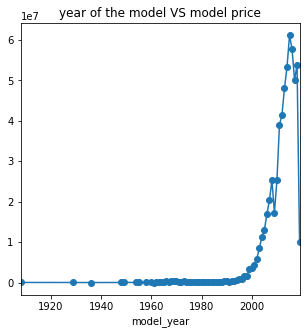

In [46]:
car_sales_ads.groupby(['model_year'])['price'].agg('sum').plot(style='o-',title='year of the model VS model price',figsize=(5,5))

## Make calculations and add them to the table

## Carry out exploratory data analysis

## Overall conclusion

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [ ]  files explored (first rows printed, info() method)
- [ ]  missing values determined
- [ ]  missing values filled in
- [ ]  clarification of the discovered missing values provided
- [ ]  data types converted
- [ ]  explanation of which columns had the data types changed and why
- [ ]  calculated and added to the table: day of the week, month, and year the ad was placed
- [ ]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [ ]  calculated and added to the table: the vehicle's average mileage per year
- [ ]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [ ]  histograms for each parameter created
- [ ]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [ ]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [ ]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [ ]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [ ]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [ ]  each stage has a conclusion
- [ ]  overall conclusion drawn